In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn


df = pd.read_table('2004-2021.tsv')

display(df.head(5))
display(df.info())


,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

None

In [2]:
# Converter diretamente com to_numeric primeiro
df['DATA INICIAL'] = pd.to_numeric(df['DATA INICIAL'], errors='coerce')
df['DATA FINAL'] = pd.to_numeric(df['DATA FINAL'], errors='coerce')

# Depois converter para string e preencher com zeros
df['DATA INICIAL'] = df['DATA INICIAL'].apply(lambda x: str(int(x)).zfill(6) if pd.notna(x) else None)
df['DATA FINAL'] = df['DATA FINAL'].apply(lambda x: str(int(x)).zfill(6) if pd.notna(x) else None)

# Finalmente converter para datetime
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'], format='%d%m%y', errors='coerce')
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'], format='%d%m%y', errors='coerce')


# Colunas de distribuição que vieram como object mas são números
cols_dist = [
    'PREÇO MÉDIO DISTRIBUIÇÃO',
    'DESVIO PADRÃO DISTRIBUIÇÃO',
    'PREÇO MÍNIMO DISTRIBUIÇÃO',
    'PREÇO MÁXIMO DISTRIBUIÇÃO',
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
    'MARGEM MÉDIA REVENDA'
]

for col in cols_dist:
    # Substituir '-' por NaN e depois converter vírgula para ponto
    df[col] = df[col].replace('-', None)  # ou np.nan
    df[col] = df[col].str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()
display(df.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   0 non-null       datetime64[ns]
 1   DATA FINAL                     0 non-null       datetime64[ns]
 2   REGIÃO                         120823 non-null  object        
 3   ESTADO                         120823 non-null  object        
 4   PRODUTO                        120823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 6   UNIDADE DE MEDIDA              120823 non-null  object        
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64       
 11  

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,NaT,NaT,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,NaT,NaT,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,NaT,NaT,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,NaT,NaT,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,NaT,NaT,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082


📊 ANÁLISE DE PREÇOS DE COMBUSTÍVEIS (2004-2021)

1️⃣ VISÃO GERAL DO DATASET
   Total de registros: 120,823
   Produtos analisados: 9
   Estados cobertos: 27
   Regiões: 5

2️⃣ REGISTROS POR TIPO DE COMBUSTÍVEL
PRODUTO
GASOLINA COMUM        23570
GLP                   23561
ETANOL HIDRATADO      23440
ÓLEO DIESEL           21194
GNV                   14469
ÓLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: count, dtype: int64

3️⃣ PREÇOS MÉDIOS POR PRODUTO (Revenda)
                     Média  Desvio Padrão  Mínimo   Máximo
PRODUTO                                                   
ETANOL HIDRATADO     2.445          0.738   0.766    5.960
GASOLINA ADITIVADA   5.049          0.513   3.849    6.683
GASOLINA COMUM       3.195          0.771   1.888    6.688
GLP                 47.655         15.927  28.026  107.500
GNV                  2.033          0.654   0.975    4.779
OLEO DIESEL          3.711          0.403   2.730 

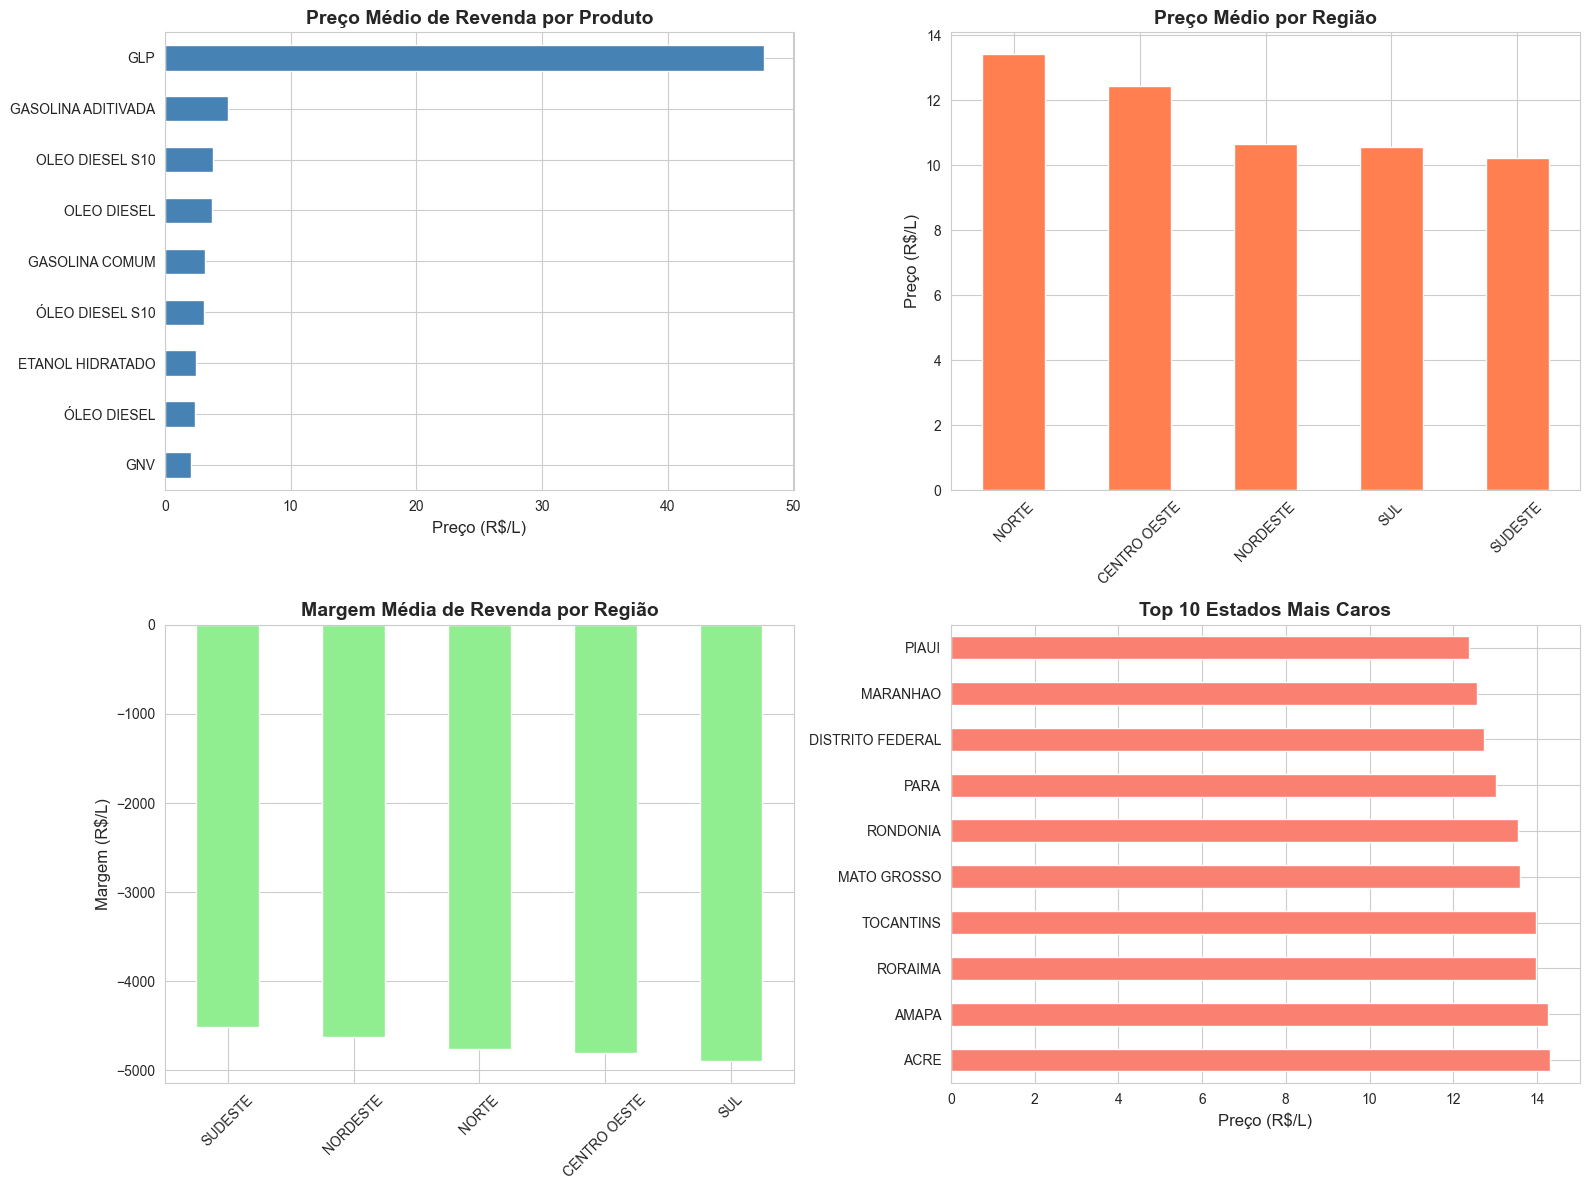


8️⃣ COMPARAÇÃO GASOLINA x ETANOL
   Gasolina Comum: R$ 3.195/L
   Etanol Hidratado: R$ 2.445/L
   Razão Etanol/Gasolina: 76.52%
   ❌ Gasolina é mais vantajosa

✅ Análise concluída! Gráficos salvos em 'analise_combustiveis.png'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações de visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Ler dados
df = pd.read_table('2004-2021.tsv')

# Remover colunas de data problemáticas
df = df.drop(['DATA INICIAL', 'DATA FINAL'], axis=1)

# Converter colunas de preços
cols_dist = [
    'PREÇO MÉDIO DISTRIBUIÇÃO',
    'DESVIO PADRÃO DISTRIBUIÇÃO',
    'PREÇO MÍNIMO DISTRIBUIÇÃO',
    'PREÇO MÁXIMO DISTRIBUIÇÃO',
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
    'MARGEM MÉDIA REVENDA'
]

for col in cols_dist:
    df[col] = df[col].replace('-', None)
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Converter colunas de revenda
cols_revenda = [
    'PREÇO MÉDIO REVENDA',
    'DESVIO PADRÃO REVENDA',
    'PREÇO MÍNIMO REVENDA',
    'PREÇO MÁXIMO REVENDA',
    'MARGEM MÉDIA REVENDA',
    'COEF DE VARIAÇÃO REVENDA'
]

for col in cols_revenda:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("="*80)
print("📊 ANÁLISE DE PREÇOS DE COMBUSTÍVEIS (2004-2021)")
print("="*80)

# 1. Visão Geral
print("\n1️⃣ VISÃO GERAL DO DATASET")
print(f"   Total de registros: {len(df):,}")
print(f"   Produtos analisados: {df['PRODUTO'].nunique()}")
print(f"   Estados cobertos: {df['ESTADO'].nunique()}")
print(f"   Regiões: {df['REGIÃO'].nunique()}")

# 2. Distribuição por Produto
print("\n2️⃣ REGISTROS POR TIPO DE COMBUSTÍVEL")
print(df['PRODUTO'].value_counts())

# 3. Análise de Preços por Produto
print("\n3️⃣ PREÇOS MÉDIOS POR PRODUTO (Revenda)")
precos_produto = df.groupby('PRODUTO')['PREÇO MÉDIO REVENDA'].agg(['mean', 'std', 'min', 'max'])
precos_produto.columns = ['Média', 'Desvio Padrão', 'Mínimo', 'Máximo']
print(precos_produto.round(3))

# 4. Análise por Região
print("\n4️⃣ PREÇO MÉDIO DE REVENDA POR REGIÃO")
precos_regiao = df.groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].mean().sort_values(ascending=False)
print(precos_regiao.round(3))

# 5. Margem Média por Região
print("\n5️⃣ MARGEM MÉDIA DE REVENDA POR REGIÃO")
margem_regiao = df.groupby('REGIÃO')['MARGEM MÉDIA REVENDA'].mean().sort_values(ascending=False)
print(margem_regiao.round(3))

# 6. Top 10 Estados Mais Caros
print("\n6️⃣ TOP 10 ESTADOS COM COMBUSTÍVEL MAIS CARO")
estados_caros = df.groupby('ESTADO')['PREÇO MÉDIO REVENDA'].mean().sort_values(ascending=False).head(10)
print(estados_caros.round(3))

# 7. Análise de Variabilidade
print("\n7️⃣ ESTADOS COM MAIOR VARIAÇÃO DE PREÇOS")
variacao_estados = df.groupby('ESTADO')['COEF DE VARIAÇÃO REVENDA'].mean().sort_values(ascending=False).head(10)
print(variacao_estados.round(3))

# VISUALIZAÇÕES
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Preço Médio por Produto
ax1 = axes[0, 0]
precos_produto_plot = df.groupby('PRODUTO')['PREÇO MÉDIO REVENDA'].mean().sort_values()
precos_produto_plot.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Preço Médio de Revenda por Produto', fontsize=14, fontweight='bold')
ax1.set_xlabel('Preço (R$/L)', fontsize=12)
ax1.set_ylabel('')

# Gráfico 2: Preço por Região
ax2 = axes[0, 1]
precos_regiao.plot(kind='bar', ax=ax2, color='coral')
ax2.set_title('Preço Médio por Região', fontsize=14, fontweight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('Preço (R$/L)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Gráfico 3: Margem por Região
ax3 = axes[1, 0]
margem_regiao.plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Margem Média de Revenda por Região', fontsize=14, fontweight='bold')
ax3.set_xlabel('')
ax3.set_ylabel('Margem (R$/L)', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

# Gráfico 4: Top 10 Estados Mais Caros
ax4 = axes[1, 1]
estados_caros.plot(kind='barh', ax=ax4, color='salmon')
ax4.set_title('Top 10 Estados Mais Caros', fontsize=14, fontweight='bold')
ax4.set_xlabel('Preço (R$/L)', fontsize=12)
ax4.set_ylabel('')

plt.tight_layout()
plt.savefig('analise_combustiveis.png', dpi=300, bbox_inches='tight')
plt.show()

# Análise adicional: Gasolina vs Etanol
print("\n8️⃣ COMPARAÇÃO GASOLINA x ETANOL")
if 'GASOLINA COMUM' in df['PRODUTO'].values and 'ETANOL HIDRATADO' in df['PRODUTO'].values:
    gasolina = df[df['PRODUTO'] == 'GASOLINA COMUM']['PREÇO MÉDIO REVENDA'].mean()
    etanol = df[df['PRODUTO'] == 'ETANOL HIDRATADO']['PREÇO MÉDIO REVENDA'].mean()
    
    print(f"   Gasolina Comum: R$ {gasolina:.3f}/L")
    print(f"   Etanol Hidratado: R$ {etanol:.3f}/L")
    print(f"   Razão Etanol/Gasolina: {(etanol/gasolina):.2%}")
    print(f"   {'✅ Etanol vale a pena!' if (etanol/gasolina) < 0.70 else '❌ Gasolina é mais vantajosa'}")

print("\n" + "="*80)
print("✅ Análise concluída! Gráficos salvos em 'analise_combustiveis.png'")
print("="*80)